In [1]:
import numpy as np
import pandas as pd
from curve_fit import fit,fitted
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/electric-motor-eff.csv")
data = {}
for col in df.columns:
    arr = np.array(df[col])
    arr = arr[~np.isnan(arr)]
    data[col]= arr

Generate fit params

In [3]:
params = {}
modes = {}
metrics = ["efficiency","torque","power"]
for metric in metrics:
    params[metric], modes[metric] = fit(data[f"{metric}X"],data[f"{metric}Y"])

0.01291505660900172 0.01473055472958024
0.001292841512112701 0.0014491853768782374
0.0025683716983047502 0.0031670194875299713


Plot results

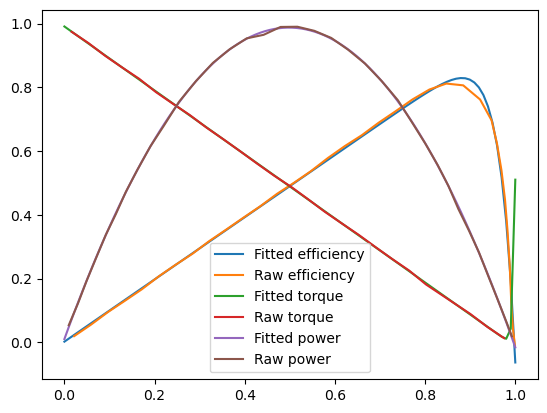

In [4]:
plt.figure()
x = np.linspace(0,1,100)
for metric in metrics:
    y = fitted(x,params[metric],modes[metric])
    plt.plot(x,y,label=f"Fitted {metric}")
    plt.plot(data[f"{metric}X"],data[f"{metric}Y"],label=f"Raw {metric}")
plt.legend()
plt.show()